In [1]:
import pandas as pd
import statistics
import numpy as np
import seaborn as sns

In [222]:
# reading csv file of monthly energy consumption broken down by type of energy source 
df = pd.read_csv('Monthly_NetGeneration_USA.csv')
df

,description,units,source key,1-Jan,1-Feb,1-Mar,1-Apr,1-May,1-Jun,1-Jul,...,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,19-Nov,19-Dec,20-Jan
0,United States,thousand megawatthours,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,332493,282940,300707,278079,300492,327694,357614,...,294577.0,328269.0,351363.0,411616.0,401665.0,359545.0,321875.0,316672.0,337253.0,339320.0
2,coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,177287,149735,155269,140671,151593,162616,179060,...,60008.0,71883.0,78610.0,100981.0,94177.0,85918.0,66829.0,75560.0,72554.0,65170.0
3,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,17300,9626,10981,10237,9641,10997,10050,...,788.0,943.0,976.0,1029.0,1084.0,942.0,955.0,911.0,961.0,934.0
4,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-99.M,812,716,752,627,749,825,992,...,446.0,747.0,555.0,746.0,687.0,638.0,198.0,339.0,409.0,687.0
5,natural gas,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,73030,...,103006.0,116236.0,136994.0,174341.0,176458.0,150753.0,133667.0,117762.0,129342.0,132980.0
6,other gases,thousand megawatthours,ELEC.GEN.OOG-US-99.M,718,676,769,698,785,733,840,...,1071.0,1101.0,1025.0,1290.0,1202.0,1139.0,997.0,1196.0,1136.0,1211.0
7,nuclear,thousand megawatthours,ELEC.GEN.NUC-US-99.M,68707,61272,62141,56003,61512,68023,69166,...,60581.0,67124.0,68805.0,72199.0,71911.0,66064.0,62033.0,64125.0,73074.0,74204.0
8,conventional hydroelectric,thousand megawatthours,ELEC.GEN.HYC-US-99.M,18852,17473,20477,18013,19176,20728,18079,...,25483.0,30061.0,26469.0,23730.0,21041.0,16324.0,16292.0,20520.0,22206.0,24286.0
9,wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389,431,532,685,635,670,635,...,29711.0,25973.0,22947.0,22024.0,19869.0,24385.0,28136.0,25603.0,27183.0,28403.0


In [223]:
# cleaning the data
df = df.fillna(0)
df = df.replace('--',0)
df = df.drop(df.columns[2], axis=1)
df = df[1:18]
df=df.T
df.columns = df.iloc[0]
df = df[2:]
for col in df.columns:
    df[col] = df[col].astype(int)

               non_renewable  renewable
non_renewable       1.000000   0.206699
renewable           0.206699   1.000000


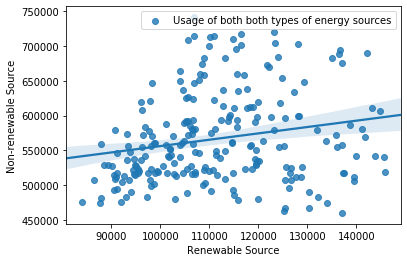

In [309]:
# splitting the data by two energy source categories: renewable energy and non-renewable energy 
non_renewable = df['all fuels (utility-scale)']+df['coal']+df['petroleum liquids']+df['petroleum coke']+df['natural gas']+df['other gases']
renewable = df['nuclear']+df['conventional hydroelectric']+df['wind']+df['all solar']+df['geothermal']+df['biomass']+df['wood and wood-derived fuels']+df['other biomass']+df['hydro-electric pumped storage']+df['other']
is_renewable = pd.DataFrame({'non_renewable':non_renewable,'renewable':renewable})

#checking the correlation between the two
correlations = is_renewable.corr()
print(correlations)

a=sns.regplot(x=renewable, y=non_renewable, label='Usage of both both types of energy sources')
a.set(xlabel='Renewable Source')
a.set(ylabel='Non-renewable Source')
a.legend()

In [271]:
# We see that the two categoris have a positive correlation. It make sense because at times of high usage, both categories
# are being used more.

Intercept:  154.7650830927305 
 Coefficient:  5.082487985625197


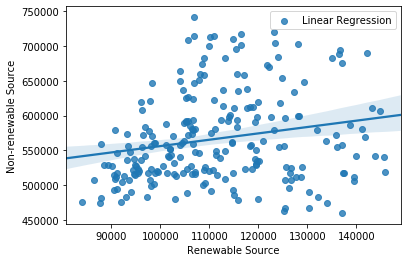

In [299]:
# Creating a Linear Regression model
x = np.array(renewable)
y = np.array(non_renewable)
m_x, m_y = np.mean(x), np.mean(y)
SS_xy = np.sum(y*x) - np.size(x)*m_y*m_x 
SS_xx = np.sum(x*x) - np.size(x)*m_x*m_x
b1 = SS_xy / SS_xx 
b0 = m_y - b1*m_x

b=sns.regplot(x=x, y=y, label='Linear Regression')
b.set(xlabel='Renewable Source')
b.set(ylabel='Non-renewable Source')
b.legend()

print('Intercept: ', b0, '\n','Coefficient: ', b1)

In [311]:
import statsmodels.api as sm

In [313]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                1197.213
Model:                            OLS   Adj. R-squared (uncentered):           1202.460
Method:                 Least Squares   F-statistic:                             -228.2
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        1.00
Time:                        03:23:09   Log-Likelihood:                         -2928.3
No. Observations:                 229   AIC:                                      5859.
Df Residuals:                     228   BIC:                                      5862.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0147      0.051     98.357      0.000       4.914       5.115
==============================================================================
Omnibus:                       11.089   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.856
Skew:                          -0.556   Prob(JB):                      0.00266
Kurtosis:                       2.930   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# We can conclude that we don't have enough data for regression analysis